In [21]:
%matplotlib inline
import os
import flow
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='notebook', style='darkgrid')
from IPython.display import clear_output
import pandas as pd
import cascade as cas

In [1]:
import cascade as cas

In [4]:
cas.plotting.plt.xdayheatmap('OA27', cell_id=range(4,1556), vmax=0.5, vmin=-0.5)

Cell: 4: done.
Cell: 5: done.
Cell: 6: done.
Cell: 7: done.
Cell: 8: done.
Cell: 9: done.
Cell: 10: done.
Cell: 11: done.
Cell: 12: done.
Cell: 13: done.
Cell: 14: done.
Cell: 15: done.
Cell: 16: done.
Cell: 17: done.
Cell: 18: done.
Cell: 19: done.
Cell: 20: done.
Cell: 21: done.
Cell: 22: done.
Cell: 23: done.
Cell: 24: done.
Cell: 25: done.
Cell: 26: done.
Cell: 27: done.
Cell: 28: done.
Cell: 29: done.
Cell: 30: done.
Cell: 31: done.
Cell: 32: done.
Cell: 33: done.
Cell: 34: done.
Cell: 35: done.
Cell: 36: done.
Cell: 37: done.
Cell: 38: done.
Cell: 39: done.
Cell: 40: done.
Cell: 41: done.
Cell: 42: done.
Cell: 43: done.
Cell: 44: done.
Cell: 45: done.
Cell: 46: done.
Cell: 47: done.
Cell: 48: done.
Cell: 49: done.
Cell: 50: done.
Cell: 51: done.
Cell: 52: done.
Cell: 53: done.
Cell: 54: done.
Cell: 55: done.
Cell: 56: done.
Cell: 57: done.
Cell: 58: done.
Cell: 59: done.
Cell: 60: done.
Cell: 61: done.
Cell: 62: done.
Cell: 63: done.
Cell: 64: done.
Cell: 65: done.
Cell: 66: done

KeyboardInterrupt: 

In [2]:
# Load your triggered traces and corresponding metadata 
mouse = 'OA27'
trace_type = 'dff'
days = flow.metadata.DateSorter.frommeta(mice=[mouse])

# load metadata
meta_path = os.path.join(flow.paths.outd, mouse + '_df_' + trace_type + '_trialmeta.pkl')
dfm = pd.read_pickle(meta_path)

# build crossday matrix to use for efficient loading/indexing
# cell_mat = []
# cell_vec = []
# for day in days:
#     cell_ids = flow.xday._read_crossday_ids(day.mouse, day.date)
#     cell_ids = [int(s) for s in cell_ids]
#     cell_mat.append(cell_ids)
#     cell_vec.extend(cell_ids)
# all_cells = np.unique(cell_vec)

# cell_map = np.zeros((len(all_cells),len(days)))
# for day_num in range(len(days)):
#     for cell_num in range(len(all_cells)):
# #         print(np.isin(cell, cell_mat[day_num]))
#         if np.isin(all_cells[cell_num], cell_mat[day_num]):
#             cell_map[cell_num, day_num] = 1

# plt.figure(figsize=(12,100))
# plt.imshow(cell_map)

# Build an xday matrix to ensure no wasted loading
# Use this to determine number of days to iterate through per cell
xmap = cas.df.get_xdaymap('OA27')

dft = cas.df.singlecell(mouse, trace_type, 46, xmap=xmap)
print(dft.head())

# cell_num = 8
# print(np.where(xmap[cell_num,:])[0])
# # load all dfs that contain the cell of interest
# cell_xday = []
# for d in np.where(xmap[cell_num,:] == 1)[0]:
#     print(d)
#     cell_id = cell_num + 1
#     path = os.path.join(flow.paths.outd, str(days[d].mouse) + '_'
#                         + str(days[d].date) + '_df_' + trace_type + '.pkl')
#     dft = pd.read_pickle(path)
#     cell_indexer = dft.index.get_level_values('cell_idx') == cell_id
#     dft = dft.loc[cell_indexer,:]
#     cell_xday.append(dft)
    
# dft = pd.concat(cell_xday)
# dft.head()
# loop through dates and load 
# trig_path = os.path.join(flow.paths.outd, str(days[15].mouse) + '_' + str(days[15].date) + '_df_' + trace_type + '.pkl')
# trig_path2 = os.path.join(flow.paths.outd, str(days[16].mouse) + '_' + str(days[16].date) + '_df_' + trace_type + '.pkl')
# dfm = pd.read_pickle(meta_path)
# dft = pd.read_pickle(trig_path)
# dft2 = pd.read_pickle(trig_path2)


                                                  trace
mouse date   run trial_idx cell_idx timestamp          
OA27  170116 2   0         46       -1.000000 -0.009399
                                    -0.967742  0.132693
                                    -0.935484  0.081996
                                    -0.903226  0.164460
                                    -0.870968 -0.038921


In [10]:
dfm.head()

condition  ensure  firstlick  hunger  \
mouse date   run trial_idx                                               
OA27  170116 2   0          orientation_315     NaN        NaN  hungry   
                 1           orientation_90     NaN        NaN  hungry   
                 2          orientation_270     NaN        NaN  hungry   
                 3           orientation_90     NaN        NaN  hungry   
                 4          orientation_225     NaN        NaN  hungry   

                            orientation  quinine run_type  speed  \
mouse date   run trial_idx                                         
OA27  170116 2   0                  315      NaN    naive    NaN   
                 1                   90      NaN    naive    NaN   
                 2                  270      NaN    naive    NaN   
                 3                   90      NaN    naive    NaN   
                 4                  225      NaN    naive    NaN   

                                            tag  trialerror  
mouse date   run trial_idx                                   
OA27  170116 2   0          orientation_mapping           1  
                 1          orientation_mapping           1  
                 2          orientation_mapping           1  
                 3          orientation_mapping           1  
                 4          orientation_mapping           1

In [3]:
# df = pd.concat([dft, dft2])
# print(dfm.head())
trial_indexer = (((dfm.orientation == 0) | (dfm.orientation == 135) | (dfm.orientation == 270))
                 & ((dfm.tag == 'standard') | (dfm.tag == 'learning_start') | (dfm.tag == 'reversal1_start')
                 | (dfm.tag == 'reversal2_start'))
                 & ((dfm.condition == 'plus') | (dfm.condition == 'minus') | (dfm.condition == 'neutral'))
                 & (dfm.hunger == 'hungry'))
# print(trial_indexer[2])
# test = [((dfm['orientation'] == 0) | (dfm['orientation'] == 135) | (dfm['orientation'] == 270))
#               & ((dfm['tag'] == 'standard') | (dfm['tag'] == 'learning_start') | (dfm['tag'] == 'reversal1_start')
#               | (dfm['tag'] == 'reversal2_start'))
#               & ((dfm['condition'] == 'plus') | (dfm.condition == 'minus') | (dfm.condition == 'neutral'))
#               & (dfm.hunger == 'hunger')]

dfm = dfm.loc[trial_indexer,:]

print(dfm.head())

                           condition  ensure  firstlick  hunger  orientation  \
mouse date   run trial_idx                                                     
OA27  170116 3   0              plus     NaN        NaN  hungry            0   
                 1           neutral     NaN        NaN  hungry          135   
                 2             minus     NaN        NaN  hungry          270   
                 3              plus     NaN        NaN  hungry            0   
                 4           neutral     NaN        NaN  hungry          135   

                            quinine run_type  speed       tag  trialerror  
mouse date   run trial_idx                                                 
OA27  170116 3   0              NaN    naive    NaN  standard           1  
                 1              NaN    naive    NaN  standard           2  
                 2              NaN    naive    NaN  standard           4  
                 3              NaN    naive    NaN  standa

In [25]:
print(dft.head())

                                                  trace
mouse date   run trial_idx cell_idx timestamp          
OA27  170116 2   0         9        -1.000000  0.158136
                                    -0.967742  0.006125
                                    -0.935484  0.867014
                                    -0.903226  0.852613
                                    -0.870968  0.243914


In [4]:
# merge your dataframes on trial_idx
# print(df_m.head())
dft = dft.reset_index(level=['cell_idx', 'timestamp'])
print(dft.head())

                            cell_idx  timestamp     trace
mouse date   run trial_idx                               
OA27  170116 2   0                46  -1.000000 -0.009399
                 0                46  -0.967742  0.132693
                 0                46  -0.935484  0.081996
                 0                46  -0.903226  0.164460
                 0                46  -0.870968 -0.038921


In [5]:
# merge your dataframes on trial_idx
df = pd.merge(dft, dfm, on=['mouse', 'date', 'run', 'trial_idx'], how='inner')

In [28]:
# filter your merged df to only include the trial types you want to be dealing with
# df1 = df.loc[((df.orientation == 0) | (df.orientation == 135) | (df.orientation == 270))
#              & ((df.tag == 'standard') | (df.tag == 'learning_start') | (df.tag == 'reversal1_start')) 
#              & (df.cell_idx == 9),:]
df.head()

cell_idx  timestamp     trace condition  ensure  \
mouse date   run trial_idx                                                    
OA27  170116 3   0                 9  -1.000000  0.091147      plus     NaN   
                 0                 9  -0.967742  0.161392      plus     NaN   
                 0                 9  -0.935484  1.194164      plus     NaN   
                 0                 9  -0.903226  0.339921      plus     NaN   
                 0                 9  -0.870968  0.271647      plus     NaN   

                            firstlick  hunger  orientation  quinine run_type  \
mouse date   run trial_idx                                                     
OA27  170116 3   0                NaN  hungry            0      NaN    naive   
                 0                NaN  hungry            0      NaN    naive   
                 0                NaN  hungry            0      NaN    naive   
                 0                NaN  hungry            0      NaN    naive   
                 0                NaN  hungry            0      NaN    naive   

                            speed       tag  trialerror  
mouse date   run trial_idx                               
OA27  170116 3   0            NaN  standard           1  
                 0            NaN  standard           1  
                 0            NaN  standard           1  
                 0            NaN  standard           1  
                 0            NaN  standard           1

In [23]:
# remove nan trials 
# df1 = df1.loc[np.isfinite(df1.trace),:]
# print(np.sum(np.isnan(df1['trace'])))
# np.unique(df['cell_idx']) #2,    3,    4,    9,   10,   13,   15,   17,   29,   30,   31,
# df1.head()
def myheatmap(data, **kwargs):
    
#     print(data.head())
    mydata = data.set_index('orientation', append=True)
    print(np.shape(mydata))
    print(len(mydata.index.get_level_values('orientation')))
#     print(mydata.head())
    sns.heatmap(mydata, **kwargs)

(397, 217)
397
(430, 217)
430
(1137, 217)
1137
397
(397.0, 0.0)
430
(430.0, 0.0)
1137
(1137.0, 0.0)


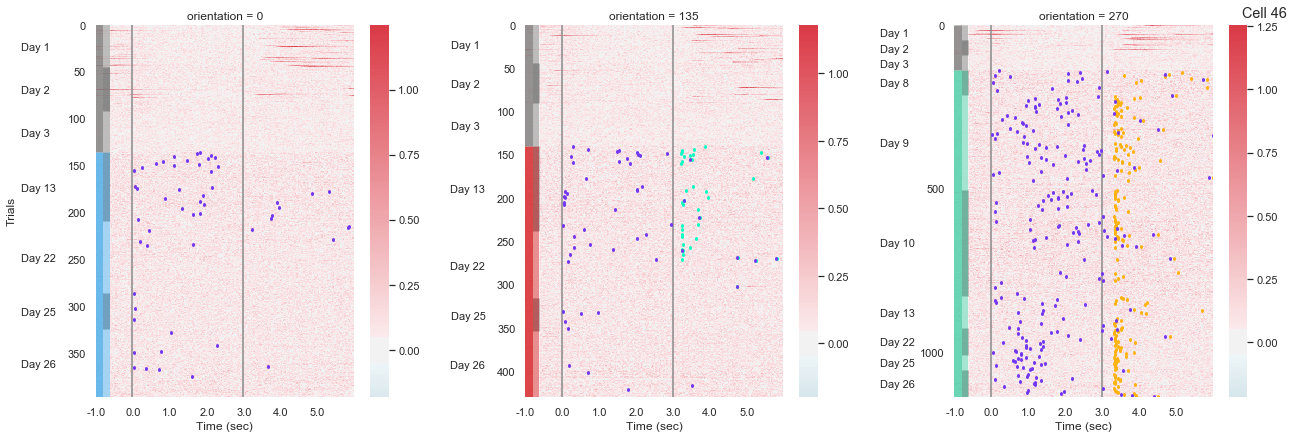

In [28]:
# baseline subtraction seems off
# housekeeping for naive metadata
# auto scaling of cdata

run_line = False
day_line = False
cs_bar = True
day_bar = True
cell = 46
# arthur's predetermined hex colors 
colors = {
    'orange': '#E86E0A',
    'red': '#D61E21',
    'gray': '#7C7C7C',
    'black': '#000000',
    'green': '#75D977',
    'mint': '#47D1A8',
    'purple': '#C880D1',
    'indigo': '#5E5AE6',
    'blue': '#47AEED', # previously 4087DD
    'yellow': '#F2E205',
}

# cs to color mapping 
cs_colors = {
    'plus': 'mint',
    'minus': 'red',
    'neutral': 'blue',
    'pavlovian': 'mint',
    'naive': 'gray'
}

# day_colors = {
#     'Ared1': ['#E6B0AA', '#D98880', '#CD6155', '#C0392B', '#A93226'],
#     'Bred2': ['#F5B7B1', '#F1948A', '#EC7063', '#E74C3C', '#CB4335'],
#     'Cpurple3': ['#D7BDE2', '#C39BD3', '#AF7AC5', '#9B59B6', '#884EA0'],
#     'Dpurple4': ['#D2B4DE', '#BB8FCE', '#A569BD', '#8E44AD', '#7D3C98'],
#     'Eblue5': ['#A9CCE3', '#7FB3D5', '#5499C7', '#2980B9', '#2471A3'],
#     'Fblue6': ['#AED6F1', '#85C1E9', '#5DADE2', '#3498DB', '#2E86C1'],
#     'Ggreen7': ['#A3E4D7', '#76D7C4', '#48C9B0', '#1ABC9C', '#17A589'],
#     'Hgreen8': ['#A2D9CE', '#73C6B6', '#45B39D', '#16A085', '#138D75'],
#     'Igreen9': ['#A9DFBF', '#7DCEA0', '#52BE80', '#27AE60', '#229954'],
#     'Jgreen10': ['#ABEBC6', '#82E0AA', '#58D68D', '#2ECC71', '#28B463'],
#     'Kyellow11': ['#F9E79F', '#F7DC6F', '#F4D03F', '#F1C40F', '#D4AC0D'],
#     'Lorange12': ['#FAD7A0', '#F8C471', '#F5B041', '#F39C12', '#D68910'],
#     'Morange13': ['#F5CBA7', '#F0B27A', '#EB984E', '#E67E22', '#CA6F1E'],
#     'Norange14': ['#EDBB99', '#E59866', '#DC7633', '#D35400', '#BA4A00', '#A04000'],
#       'grey': ['#D6DBDF', '#AEB6BF', '#85929E', '#5D6D7E', '#34495E']
# }

# day_colors = {
#      'Abeige': ['#a77676', '#b28887', '#bd9998', '#c8aaa9', '#d3bbba'],
#      'Bgrey': ['#D6DBDF', '#AEB6BF', '#85929E', '#5D6D7E', '#34495E'][::-1]
# }
day_colors = {
     'A': '#FDFEFE',
     'B': '#7B7D7D'
}
# red=high, white=middle, blue=low colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# get timestamp info for plotting lines
times = df['timestamp']
zero_sec = np.where(np.unique(times) >= 0)[0][0]
three_sec = np.where(np.unique(times) >= 3)[0][0]

# oris
oris = np.array([0, 135, 270])

# plot main figure
# full_trace = df['trace']
# full_trace[full_trace < 10]
# vmax = np.nanmax(full_trace[full_trace < 10])
# vmin = np.nanmin(full_trace[full_trace > -10])
toplot = df.pivot_table(index=['date', 'run','trial_idx','orientation'] , columns=['timestamp'], values='trace')
g = sns.FacetGrid(toplot.reset_index('orientation'), col='orientation', height=6, sharey=False, dropna=False)
g.map_dataframe(myheatmap, center=0, xticklabels=31, cmap=cmap)  
g.fig.suptitle('Cell ' + str(cell), x=0.98)

# loop through axes and plot relevant metadata on top
count = 0
# cmax = []
# cmin = []
for ax in g.axes[0]:
    
    # get metadata for this orientation/set of trials
    meta = df.loc[df['orientation'] == oris[count], ['condition', 'ensure', 'quinine', 'firstlick', 'run_type']]
    meta = meta.reset_index()
    meta = meta.drop_duplicates()
    ensure = np.array(meta['ensure'])
    quinine = np.array(meta['quinine'])
    firstlick = np.array(meta['firstlick'])
    css = meta['condition']
    run_type = meta['run_type']
    
    
    
    ori_inds = np.array(toplot.index.get_level_values('orientation'))
    ori_inds = ori_inds == oris[count]

    # set labels
    if count == 0:
        ax.set_ylabel('Trials')
    ax.set_xlabel('Time (sec)')
    
    # get automatic vmin/vmax
#     cmin.append(ax.collections[0].colorbar.vmin)
#     cmax.append(ax.collections[0].colorbar.vmin)
    
    # plot cs color bar/line
    if cs_bar:
        css[run_type == 'naive'] = 'naive'
        for cs in np.unique(css):
            cs_line_color = colors[cs_colors[cs]]
            cs_y = np.where(css == cs)[0]
            cs_y = [cs_y[0]-0.5, cs_y[-1]+0.5]
            ax.plot((5, 5), cs_y, color=cs_line_color, ls='-', lw=15, alpha=0.8, solid_capstyle='butt')
    
    # find days where learning or reversal start
#     if day_bar:
#         days = np.array(toplot.index.get_level_values('date'))
#         days = days[ori_inds]
#         runs = np.array(toplot.index.get_level_values('run'))
#         runs = runs[ori_inds]
#         count_d = 0
#         for day in np.unique(days):
#             day_runs = runs[days == day]
#             count_r = 0
#             for run in np.unique(day_runs):
#                 day_y = np.where((days == day) & (runs == run))[0]
#                 day_y = [day_y[0]-0.5, day_y[-1]+0.5]
#                 try:
#                     day_bar_color = day_colors[sorted(day_colors.keys())[count_d]][count_r]
#                 except:
#                     count_d = 0
#                     day_bar_color = day_colors[sorted(day_colors.keys())[count_d]][count_r]
                    
#                 ax.plot((11.5, 11.5), day_y, color=day_bar_color, ls='-', lw=9, alpha=0.8, solid_capstyle='butt')
                
#                 count_r = count_r + 1
#             count_d = count_d + 1
            
    # find days where learning or reversal start
    if day_bar:
        days = np.array(toplot.index.get_level_values('date'))
        days = days[ori_inds]
        runs = np.array(toplot.index.get_level_values('run'))
        runs = runs[ori_inds]
        count_d = 0
        for day in np.unique(days):
            day_y = np.where(days == day)[0]
            day_y = [day_y[0]-0.5, day_y[-1]+0.5]
#             if count_d%2 == 1:
            day_bar_color = day_colors[sorted(day_colors.keys())[count_d%2]]       
            ax.plot((9, 9), day_y, color=day_bar_color, ls='-', lw=7, alpha=0.4, solid_capstyle='butt')
            count_d = count_d + 1
            
    # consider doing this with a colorbar rather than lines
    # could do hsv colors for days and shades therein for runs
    # plot lines between days
    if day_line:
        days = np.array(toplot.index.get_level_values('date'))
        days = days[ori_inds]
        days = np.diff(days)
        day_ind = np.where(days > 0)[0]
        for y in day_ind:
            day_y = [y, y]
            ax.plot(x_lim, day_y, color='#8e8e8e', ls='-', lw=2.5)
        
    # plot lines between runs
    if run_line:
        runs = np.array(toplot.index.get_level_values('run'))
        runs = runs[ori_inds]
        runs = np.diff(runs)
        run_ind = np.where(runs > 0)[0]
        for y in run_ind:
            run_y = [y, y]
            ax.plot(x_lim, run_y, color='#bababa', ls='-', lw=2.5)
    
    # plot onset/offest lines
    y_lim = ax.get_ylim()
    x_lim = ax.get_xlim()
    ax.plot((zero_sec, zero_sec), y_lim, color='#8e8e8e', ls='-', lw=2, alpha=0.8)
    ax.plot((three_sec, three_sec), y_lim, color='#8e8e8e', ls='-', lw=2, alpha=0.8)
    
    # plot quinine
    for l in range(len(quinine)):
        if np.isfinite(quinine[l]):
            x = [quinine[l], quinine[l]]
            y = [l-0.5, l+0.5]
            ax.plot(x, y, color='#0fffc3', ls='-', lw=3)
            
    # plot ensure
#     print(toplot.head())
#     teste = toplot['ensure'].values
#     teste = teste[ori_inds]
#     print(len(teste))
#     print(y_lim)
    for l in range(len(ensure)):
        if np.isfinite(ensure[l]):
            x = [ensure[l], ensure[l]]
            y = [l-0.5, l+0.5]
            ax.plot(x, y, color='#ffb30f', ls='-', lw=3)
            
    # plot licks
    for l in range(len(firstlick)):
        if np.isfinite(firstlick[l]):
            x = [firstlick[l], firstlick[l]]
            y = [l-0.5, l+0.5]
            ax.plot(x, y, color='#7237f2', ls='-', lw=3)
    
#     print(len(ensure))
#     print(len(firstlick))
#     print(y_lim)
    
    # reset ylabels
    if y_lim[0] < 100:
        step = 10
    elif y_lim[0] < 200:
        step = 20
    elif y_lim[0] < 500:
        step = 50
    elif y_lim[0] < 5000:
        step = 500
    elif y_lim[0] < 10000:
        step = 1000
    elif y_lim[0] >= 10000:
        step = 5000
    base_yticks = range(int(y_lim[-1]), int(y_lim[0]), int(step))
    base_yticks = [s for s in base_yticks]
    base_ylabels = [str(s) for s in base_yticks]
    
    dates = np.array(toplot.index.get_level_values('date'))
    dates = dates[ori_inds]
    print(len(dates))
    print((y_lim))
    date_yticks = []
    date_label = []
    
    date_rel = flow.metadata.DateSorter.frommeta(mice=[mouse])
    date_rel = [s.date for s in date_rel]
    
    for day in np.unique(dates):
        
        # find number of inds needed to shift labels to put in middle of date block
        last_ind = np.where(dates == day)[0][-1]
        first_ind = np.where(dates == day)[0][0]
        shifter = np.round((last_ind - first_ind)/2)
        label_ind = last_ind - shifter
        
        # get your relative day number 
        day_val = np.where(date_rel == day)[0][0] + 1  # add one to make it one-indexed
        
        # add a pad to keep labels left-justified 
        if day_val < 10:
            pad = '  '
        else:
            pad = ''
            
        # if the date label and trial label inds are exactly the same
        # force the label info onto one line of text
        # label days with imaging day number 
        if np.isin(label_ind, base_yticks):
            # remove the existing ind and add a special label to end
            print(base_yticks)
            print(np.isin(base_yticks, label_ind))
#             base_yticks = base_yticks[np.isin(base_yticks, label_ind)]
            base_yticks = [base_yticks[s] for s in range(len(base_yticks)) if ~np.isin(base_yticks, label_ind)[s]]
            print(base_yticks)
            break
            base_ylabels.append('Day ' + str(day_val) + '          ' + str(label_ind))
        else:
            base_ylabels.append('Day ' + str(day_val) + '          ' + pad)
        base_yticks.append(label_ind) 
            
    ax.set_yticks(base_yticks)
    ax.set_yticklabels(base_ylabels)
    
    count = count + 1

# match vmin and max across plots
# cmin = np.nanmin(cmin)
# cmax = np.nanmax(cmax)

# for ax in g.axes[0]:
#     ax.collections[0].colorbar.vmin = cmin
#     ax.collections[0].colorbar.vmax = cmax

In [18]:
### NUMBER 2
# baseline subtraction seems off
# housekeeping for naive metadata
# auto scaling of cdata

run_line = False
day_line = False
cs_bar = True
day_bar = True
cell = 10
# arthur's predetermined hex colors 
colors = {
    'orange': '#E86E0A',
    'red': '#D61E21',
    'gray': '#7C7C7C',
    'black': '#000000',
    'green': '#75D977',
    'mint': '#47D1A8',
    'purple': '#C880D1',
    'indigo': '#5E5AE6',
    'blue': '#47AEED', # previously 4087DD
    'yellow': '#F2E205',
}

# cs to color mapping 
cs_colors = {
    'plus': 'mint',
    'minus': 'red',
    'neutral': 'blue',
    'pavlovian': 'mint',
    'naive': 'gray'
}

# day_colors = {
#     'Ared1': ['#E6B0AA', '#D98880', '#CD6155', '#C0392B', '#A93226'],
#     'Bred2': ['#F5B7B1', '#F1948A', '#EC7063', '#E74C3C', '#CB4335'],
#     'Cpurple3': ['#D7BDE2', '#C39BD3', '#AF7AC5', '#9B59B6', '#884EA0'],
#     'Dpurple4': ['#D2B4DE', '#BB8FCE', '#A569BD', '#8E44AD', '#7D3C98'],
#     'Eblue5': ['#A9CCE3', '#7FB3D5', '#5499C7', '#2980B9', '#2471A3'],
#     'Fblue6': ['#AED6F1', '#85C1E9', '#5DADE2', '#3498DB', '#2E86C1'],
#     'Ggreen7': ['#A3E4D7', '#76D7C4', '#48C9B0', '#1ABC9C', '#17A589'],
#     'Hgreen8': ['#A2D9CE', '#73C6B6', '#45B39D', '#16A085', '#138D75'],
#     'Igreen9': ['#A9DFBF', '#7DCEA0', '#52BE80', '#27AE60', '#229954'],
#     'Jgreen10': ['#ABEBC6', '#82E0AA', '#58D68D', '#2ECC71', '#28B463'],
#     'Kyellow11': ['#F9E79F', '#F7DC6F', '#F4D03F', '#F1C40F', '#D4AC0D'],
#     'Lorange12': ['#FAD7A0', '#F8C471', '#F5B041', '#F39C12', '#D68910'],
#     'Morange13': ['#F5CBA7', '#F0B27A', '#EB984E', '#E67E22', '#CA6F1E'],
#     'Norange14': ['#EDBB99', '#E59866', '#DC7633', '#D35400', '#BA4A00', '#A04000'],
#       'grey': ['#D6DBDF', '#AEB6BF', '#85929E', '#5D6D7E', '#34495E']
# }

# day_colors = {
#      'Abeige': ['#a77676', '#b28887', '#bd9998', '#c8aaa9', '#d3bbba'],
#      'Bgrey': ['#D6DBDF', '#AEB6BF', '#85929E', '#5D6D7E', '#34495E'][::-1]
# }
day_colors = {
     'A': '#FDFEFE',
     'B': '#7B7D7D'
}
# red=high, white=middle, blue=low colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# get timestamp info for plotting lines
times = df['timestamp']
zero_sec = np.where(np.unique(times) >= 0)[0][0]
three_sec = np.where(np.unique(times) >= 3)[0][0]

# oris
oris = np.array([0, 135, 270])

# plot main figure
# full_trace = df['trace']
# full_trace[full_trace < 10]
# vmax = np.nanmax(full_trace[full_trace < 10])
# vmin = np.nanmin(full_trace[full_trace > -10])
toplot = df.pivot_table(index=['date', 'run','trial_idx'] , columns=['orientation','timestamp'], values='trace')
print(toplot.head())
g = sns.FacetGrid(toplot, col='orientation', height=6, sharey=False, )
g.map_dataframe(myheatmap, center=0, xticklabels=31, cmap=cmap)  
g.fig.suptitle('Cell ' + str(cell), x=0.98)

# loop through axes and plot relevant metadata on top
count = 0
# cmax = []
# cmin = []
for ax in g.axes[0]:
    
    # get metadata for this orientation/set of trials
    meta = df.loc[df['orientation'] == oris[count], ['condition', 'ensure', 'quinine', 'firstlick', 'run_type']]
    meta = meta.reset_index()
    meta = meta.drop_duplicates()
    ensure = np.array(meta['ensure'])
    quinine = np.array(meta['quinine'])
    firstlick = np.array(meta['firstlick'])
    css = meta['condition']
    run_type = meta['run_type']
    
    
    
    ori_inds = np.array(toplot.index.get_level_values('orientation'))
    ori_inds = ori_inds == oris[count]

    # set labels
    if count == 0:
        ax.set_ylabel('Trials')
    ax.set_xlabel('Time (sec)')
    
    # get automatic vmin/vmax
#     cmin.append(ax.collections[0].colorbar.vmin)
#     cmax.append(ax.collections[0].colorbar.vmin)
    
    # plot cs color bar/line
    if cs_bar:
        css[run_type == 'naive'] = 'naive'
        for cs in np.unique(css):
            cs_line_color = colors[cs_colors[cs]]
            cs_y = np.where(css == cs)[0]
            cs_y = [cs_y[0]-0.5, cs_y[-1]+0.5]
            ax.plot((5, 5), cs_y, color=cs_line_color, ls='-', lw=15, alpha=0.8, solid_capstyle='butt')
    
    # find days where learning or reversal start
#     if day_bar:
#         days = np.array(toplot.index.get_level_values('date'))
#         days = days[ori_inds]
#         runs = np.array(toplot.index.get_level_values('run'))
#         runs = runs[ori_inds]
#         count_d = 0
#         for day in np.unique(days):
#             day_runs = runs[days == day]
#             count_r = 0
#             for run in np.unique(day_runs):
#                 day_y = np.where((days == day) & (runs == run))[0]
#                 day_y = [day_y[0]-0.5, day_y[-1]+0.5]
#                 try:
#                     day_bar_color = day_colors[sorted(day_colors.keys())[count_d]][count_r]
#                 except:
#                     count_d = 0
#                     day_bar_color = day_colors[sorted(day_colors.keys())[count_d]][count_r]
                    
#                 ax.plot((11.5, 11.5), day_y, color=day_bar_color, ls='-', lw=9, alpha=0.8, solid_capstyle='butt')
                
#                 count_r = count_r + 1
#             count_d = count_d + 1
            
    # find days where learning or reversal start
    if day_bar:
        days = np.array(toplot.index.get_level_values('date'))
        days = days[ori_inds]
        runs = np.array(toplot.index.get_level_values('run'))
        runs = runs[ori_inds]
        count_d = 0
        for day in np.unique(days):
            day_y = np.where(days == day)[0]
            day_y = [day_y[0]-0.5, day_y[-1]+0.5]
#             if count_d%2 == 1:
            day_bar_color = day_colors[sorted(day_colors.keys())[count_d%2]]       
            ax.plot((9, 9), day_y, color=day_bar_color, ls='-', lw=7, alpha=0.4, solid_capstyle='butt')
            count_d = count_d + 1
            
    # consider doing this with a colorbar rather than lines
    # could do hsv colors for days and shades therein for runs
    # plot lines between days
    if day_line:
        days = np.array(toplot.index.get_level_values('date'))
        days = days[ori_inds]
        days = np.diff(days)
        day_ind = np.where(days > 0)[0]
        for y in day_ind:
            day_y = [y, y]
            ax.plot(x_lim, day_y, color='#8e8e8e', ls='-', lw=2.5)
        
    # plot lines between runs
    if run_line:
        runs = np.array(toplot.index.get_level_values('run'))
        runs = runs[ori_inds]
        runs = np.diff(runs)
        run_ind = np.where(runs > 0)[0]
        for y in run_ind:
            run_y = [y, y]
            ax.plot(x_lim, run_y, color='#bababa', ls='-', lw=2.5)
    
    # plot onset/offest lines
    y_lim = ax.get_ylim()
    x_lim = ax.get_xlim()
    ax.plot((zero_sec, zero_sec), y_lim, color='#8e8e8e', ls='-', lw=2, alpha=0.8)
    ax.plot((three_sec, three_sec), y_lim, color='#8e8e8e', ls='-', lw=2, alpha=0.8)
    
    # plot quinine
    for l in range(len(quinine)):
        if np.isfinite(quinine[l]):
            x = [quinine[l], quinine[l]]
            y = [l-0.5, l+0.5]
            ax.plot(x, y, color='#0fffc3', ls='-', lw=3)
            
    # plot ensure
    print(toplot.head())
#     teste = toplot['ensure'].values
#     teste = teste[ori_inds]
#     print(len(teste))
#     print(y_lim)
    for l in range(len(ensure)):
        if np.isfinite(ensure[l]):
            x = [ensure[l], ensure[l]]
            y = [l-0.5, l+0.5]
            ax.plot(x, y, color='#ffb30f', ls='-', lw=3)
            
    # plot licks
    for l in range(len(firstlick)):
        if np.isfinite(firstlick[l]):
            x = [firstlick[l], firstlick[l]]
            y = [l-0.5, l+0.5]
            ax.plot(x, y, color='#7237f2', ls='-', lw=3)
    
#     print(len(ensure))
#     print(len(firstlick))
#     print(y_lim)
    
    # reset ylabels
    if y_lim[0] < 100:
        step = 10
    elif y_lim[0] < 200:
        step = 20
    elif y_lim[0] < 500:
        step = 50
    elif y_lim[0] < 5000:
        step = 500
    elif y_lim[0] < 10000:
        step = 1000
    elif y_lim[0] >= 10000:
        step = 5000
    base_yticks = range(int(y_lim[-1]), int(y_lim[0]), int(step))
    base_yticks = [s for s in base_yticks]
    base_ylabels = [str(s) for s in base_yticks]
    
    dates = np.array(toplot.index.get_level_values('date'))
    dates = dates[ori_inds]
    print(len(dates))
    print((y_lim))
    date_yticks = []
    date_label = []
    
    date_rel = flow.metadata.DateSorter.frommeta(mice=[mouse])
    date_rel = [s.date for s in date_rel]
    
    for day in np.unique(dates):
        
        # find number of inds needed to shift labels to put in middle of date block
        last_ind = np.where(dates == day)[0][-1]
        first_ind = np.where(dates == day)[0][0]
        shifter = np.round((last_ind - first_ind)/2)
        label_ind = last_ind - shifter
        
        # get your relative day number 
        day_val = np.where(date_rel == day)[0][0] + 1  # add one to make it one-indexed
        
        # add a pad to keep labels left-justified 
        if day_val < 10:
            pad = '  '
        else:
            pad = ''
            
        # if the date label and trial label inds are exactly the same
        # force the label info onto one line of text
        # label days with imaging day number 
        if np.isin(label_ind, base_yticks):
            # remove the existing ind and add a special label to end
            print(base_yticks)
            print(np.isin(base_yticks, label_ind))
#             base_yticks = base_yticks[np.isin(base_yticks, label_ind)]
            base_yticks = [base_yticks[s] for s in range(len(base_yticks)) if ~np.isin(base_yticks, label_ind)[s]]
            print(base_yticks)
            break
            base_ylabels.append('Day ' + str(day_val) + '          ' + str(label_ind))
        else:
            base_ylabels.append('Day ' + str(day_val) + '          ' + pad)
        base_yticks.append(label_ind) 
            
    ax.set_yticks(base_yticks)
    ax.set_yticklabels(base_ylabels)
    
    count = count + 1

# match vmin and max across plots
# cmin = np.nanmin(cmin)
# cmax = np.nanmax(cmax)

# for ax in g.axes[0]:
#     ax.collections[0].colorbar.vmin = cmin
#     ax.collections[0].colorbar.vmax = cmax

orientation                0                                            \
timestamp            -1.000000 -0.967742 -0.935484 -0.903226 -0.870968   
date   run trial_idx                                                     
170116 3   0          0.056848  0.052127  0.234295  0.055797  0.066831   
           1               NaN       NaN       NaN       NaN       NaN   
           2               NaN       NaN       NaN       NaN       NaN   
           3          0.050118  0.131874  0.094617  0.132817  0.055466   
           4               NaN       NaN       NaN       NaN       NaN   

orientation                                                             \
timestamp            -0.838710 -0.806452 -0.774194 -0.741935 -0.709677   
date   run trial_idx                                                     
170116 3   0          0.228354  0.117453  0.137114  0.116576  0.130322   
           1               NaN       NaN       NaN       NaN       NaN   
           2               NaN       

KeyError: 'orientation'

In [25]:
 ax.collections[0].colorbar.vmin = -1

AttributeError: 'function' object has no attribute 'vmin'

In [12]:
def myheatmap(data, **kwargs):
    
#     print(data.head())
    mydata = data.set_index('orientation', append=True)
#     print(mydata.head())
    sns.heatmap(mydata, **kwargs)

In [77]:
# use runtype to make a housekeeping function that makes sure that naive is matched to learning
# force all non-orimapping presentations of plus to be plus (even if they are pavlovian) since no reward is occuring

# def trailmeta_housekeeping(trial_meta_df)

print(day_colors.keys()[0])

red1


In [46]:
days = flow.metadata.DateSorter.frommeta(mice=[mouse])

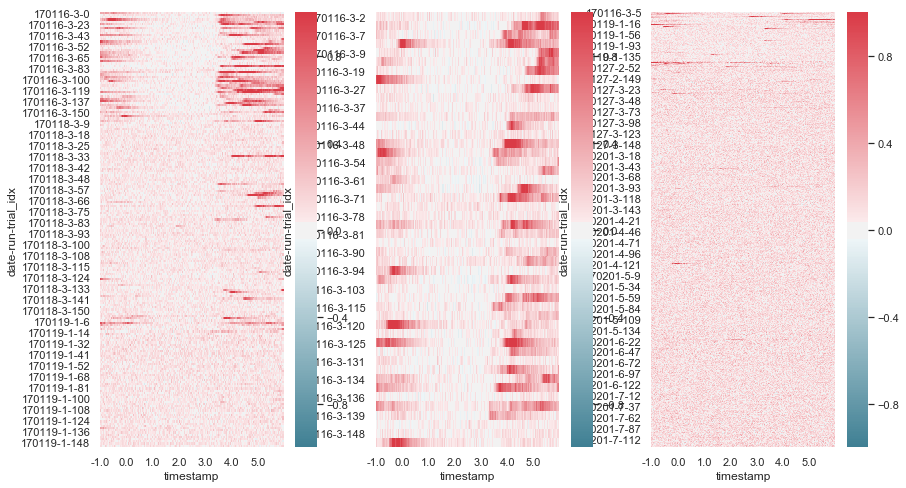

In [136]:
fig, ax = plt.subplots(1,3,figsize=(14,8))

# plotting parameters 
center = 0
vmin = -1
vmax = 1
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# slice datasets into orientations 0, 135, 270
df0 = df1.loc[(df1.orientation == 0),:]
df0 = df0.pivot_table(index=['date', 'run','trial_idx'] , columns='timestamp', values='trace')
df135 = df1.loc[(df1.orientation == 135),:]
df135 = df135.pivot_table(index=['date', 'run','trial_idx'] , columns='timestamp', values='trace')
df270 = df1.loc[(df1.orientation == 270),:]
df270 = df270.pivot_table(index=['date', 'run','trial_idx'] , columns='timestamp', values='trace')

# to plot with nans there is probably some pandas rehspe of the dataframe that will fill in 
# non overlapping values with nans

# plot heatmaps 
sns.heatmap(df0, xticklabels=31, ax=ax[0], vmax=vmax, vmin=vmin, center=center, cmap=cmap)
sns.heatmap(df135, xticklabels=31, ax=ax[1], vmax=vmax, vmin=vmin, center=center, cmap=cmap)
sns.heatmap(df270, xticklabels=31, ax=ax[2], vmax=vmax, vmin=vmin, center=center, cmap=cmap)